# Example of light sources

## Creating an instance

An instance must be created before starting to operate with light sources. The initialization accepts several arguments.     

### Creating an instance

In [1]:
from diffractio import degrees, mm, nm, np, plt, sp, um
from diffractio.scalar_sources_XY import Scalar_source_XY

## plane wave

(<Figure size 360x324 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f37db4cfa20>)

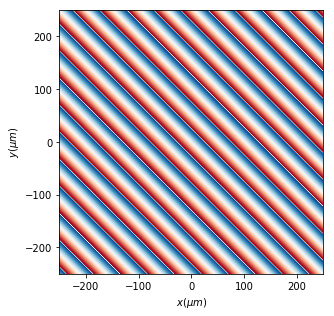

In [5]:
x0 = np.linspace(-250 * um, 250 * um, 512)
y0 = np.linspace(-250 * um, 250 * um, 512)

wavelength = 0.6328 * um


u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u.plane_wave(phi=1 * degrees, theta=45 * degrees)

# draw y guardar
u.draw(kind='phase')

### Gauss beam

vertical


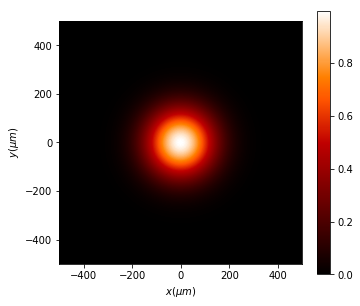

In [12]:
x0 = np.linspace(-500*um, 500*um, 512)
y0 = np.linspace(-500*um, 500*um, 512)
wavelength = 0.6238 * um

# Generación de la clase
u = Scalar_source_XY(x=x0, y=y0, 
                     wavelength=wavelength)

u.gauss_beam(
    A=1,
    r0=(0 * um, 0 * um),
    z0=0,
    w0=(200 * um, 200 * um),
    phi=0 * degrees,
    theta=0 * degrees)

# draw y guardar
u.draw(kind='intensity', has_colorbar='vertical');

## spherical wave

reduce_matrix_size: size ini = (512, 512), size_final = (512, 512)
reduce_matrix_size: size ini = (512, 512), size_final = (512, 512)


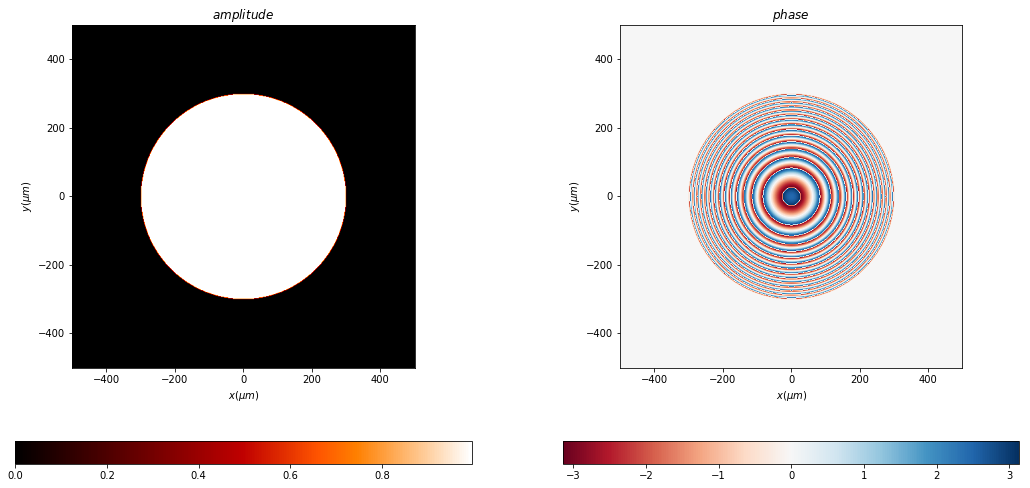

In [15]:
x0 = np.linspace(-500*um, 500*um, 512)
y0 = np.linspace(-500*um, 500*um, 512)
wavelength = 0.6238 * um

# Generación de la clase
u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

# carga de la onda esferica
u.spherical_wave(
    A=1, r0=(0 * um, 0 * um), z0=-5 * mm, radius=300 * um, mask=True)

# draw la onda esferica
u.draw(kind='field', normalize='maximum');

### vortex beam

reduce_matrix_size: size ini = (512, 512), size_final = (512, 512)
reduce_matrix_size: size ini = (512, 512), size_final = (512, 512)


((<matplotlib.image.AxesImage at 0x7f37d9f84f98>,
  <matplotlib.image.AxesImage at 0x7f37d9ee5550>),
 None,
 None)

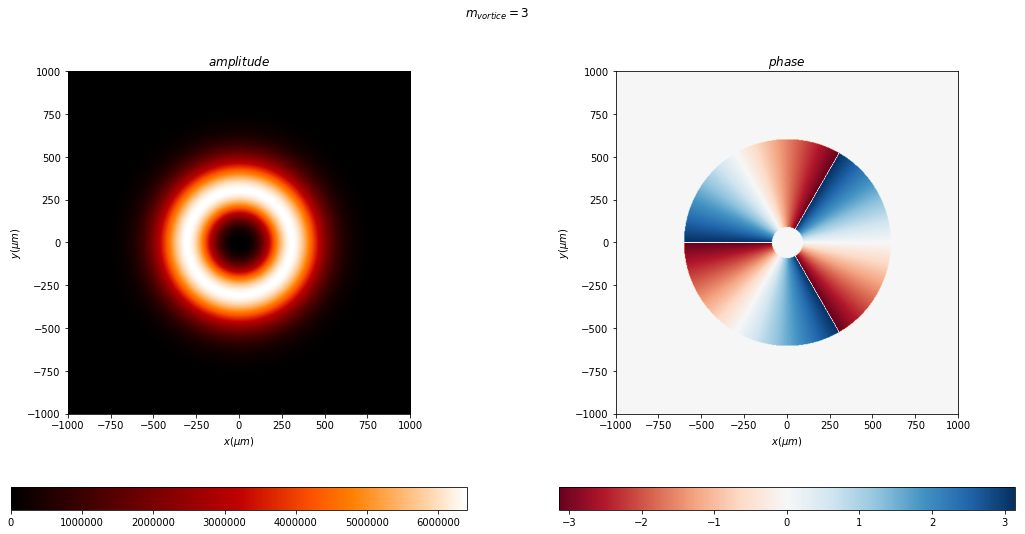

In [19]:
x0 = np.linspace(-1*mm, 1*mm, 512)
y0 = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um

m=3
u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u.vortex_beam(r0=(0, 0), w0=250 * um, m=m)

title = '$m_{vortice}= %d$' % (m)
u.draw(kind='field', title=title)

### Laguerre beams

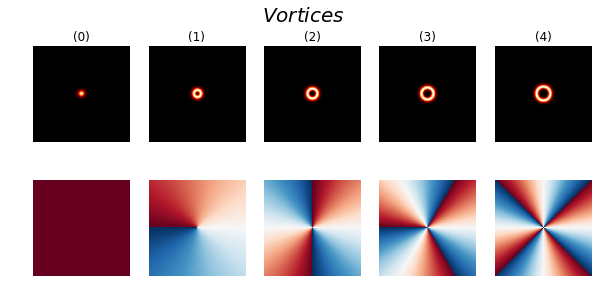

In [21]:
M = 5

x0 = np.linspace(-1*mm, 1*mm, 512)
y0 = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um

u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

# Dos drawings, uno para la amplitude y otro para phase
ID1 = plt.figure(figsize=(10, 4.5))
plt.suptitle("$Vortices$", fontsize=20)

# Generación de la clase

# Doble bucle for para ubicar en el drawing N*K haces de Laguerre
for m in range(M):
    # carga del vórtice
    u.vortex_beam(r0=(0 * um, 0 * um), w0=100 * um, m=m)

    # carga de los drawings
    title = "(%d)" % (m)
    plt.subplot(2, M, m + 1)
    plt.axis('off')
    plt.title(title)
    h1 = plt.imshow(np.abs(u.u)**2)
    h1.set_cmap("gist_heat")

    plt.subplot(2, M, m + M + 1)
    plt.axis('off')
    h2 = plt.imshow(np.angle(u.u))
    h2.set_cmap("RdBu")

## Laguerre beam

reduce_matrix_size: size ini = (512, 512), size_final = (512, 512)
reduce_matrix_size: size ini = (512, 512), size_final = (512, 512)


((<matplotlib.image.AxesImage at 0x7f37d5372630>,
  <matplotlib.image.AxesImage at 0x7f37d534aba8>),
 None,
 None)

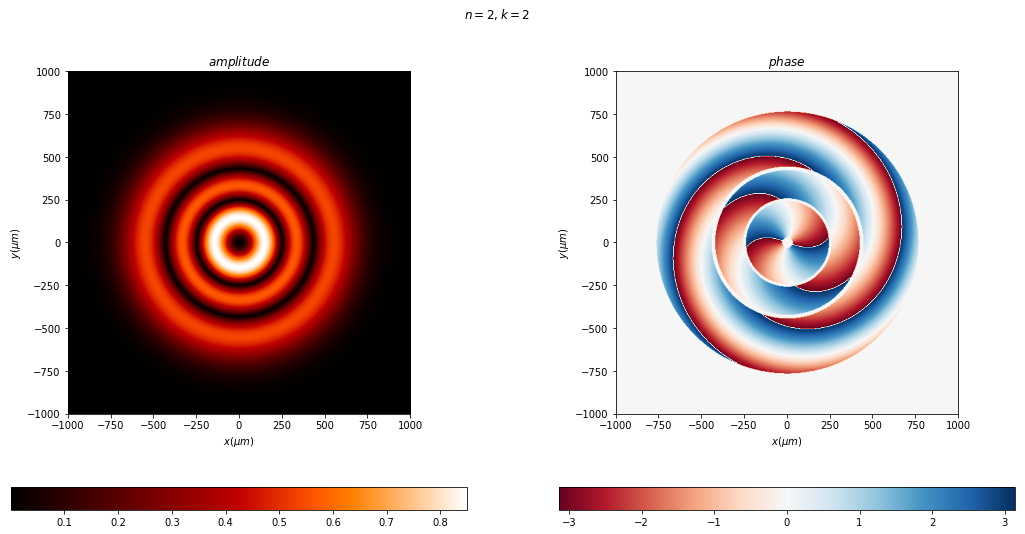

In [23]:
# tamaño de la matrix
N = 2
K = 2

x0 = np.linspace(-1*mm, 1*mm, 512)
y0 = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um

# Generación de la clase
u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

# carga del haz de Laguerre
u.laguerre_beam(
    p=N, l=K, r0=(0 * um, 0 * um), w0=250 * um, z=0.01 * um)

# drawing
title = r'$n=%d, k=%d$' % (N, K)
u.draw(kind='field', title=title)

## Laguerre beams

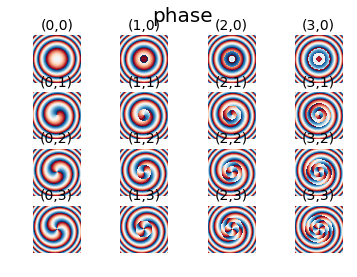

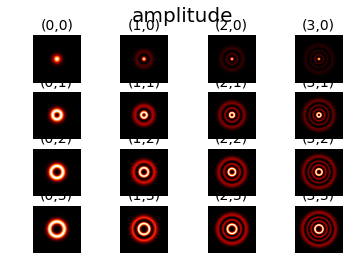

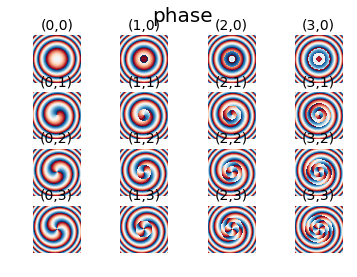

In [25]:
# tamaño de la matrix
N = 3
K = 3

x0 = np.linspace(-1*mm, 1*mm, 512)
y0 = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um

u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

# Dos drawings, uno para la amplitude y otro para phase
ID1 = plt.figure()
plt.suptitle("amplitude", fontsize=20)
ID2 = plt.figure()
plt.suptitle("phase", fontsize=20)

# Generación de la clase

# Doble bucle for para ubicar en el drawing N*K haces de Laguerre
for n in range(N + 1):
    for k in range(K + 1):

        # carga del haz de Laguerre
        u.laguerre_beam(
            p=n, l=k, r0=(0 * um, 0 * um), w0=250 * um, z=0.01 * um)

        # carga de los drawings
        title = "(%d,%d)" % (n, k)
        plt.figure(ID1.number)
        plt.subplot(N + 1, K + 1, (N + 1) * (k) + n + 1)
        plt.axis('off')
        plt.title(title, fontsize=14)
        h1 = plt.imshow(np.abs(u.u)**2)
        h1.set_cmap("gist_heat")

        plt.figure(ID2.number)
        plt.subplot(N + 1, K + 1, (N + 1) * (k) + n + 1)
        plt.axis('off')
        plt.title(title, fontsize=14)
        h2 = plt.imshow(np.angle(u.u))
        h2.set_cmap("RdBu")

plt.figure(ID1.number)
plt.figure(ID2.number)

## Hermite_Gauss

1.4714653763257912


(<Figure size 360x324 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f37d49de5f8>)

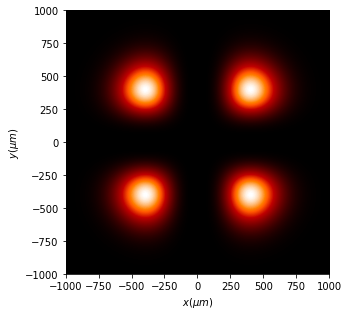

In [35]:
x0 = np.linspace(-1*mm, 1*mm, 512)
y0 = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um

u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

u.hermite_gauss_beam(
    A=1, r0=(0, 0), w0=1*mm, n=[1], m=[1], c_mn=[1])
# u.hermite_gauss_beam(A=1, r0=(0, 0), w0=1*mm, n = [0,0,1,1,3], m =[0,1,0,1,3], c_mn=[1,1,1,1,1])

u.draw(kind='intensity')

## Zernike beam

reduce_matrix_size: size ini = (512, 512), size_final = (512, 512)
reduce_matrix_size: size ini = (512, 512), size_final = (512, 512)


((<matplotlib.image.AxesImage at 0x7f37d473ab38>,
  <matplotlib.image.AxesImage at 0x7f37d470b0f0>),
 None,
 None)

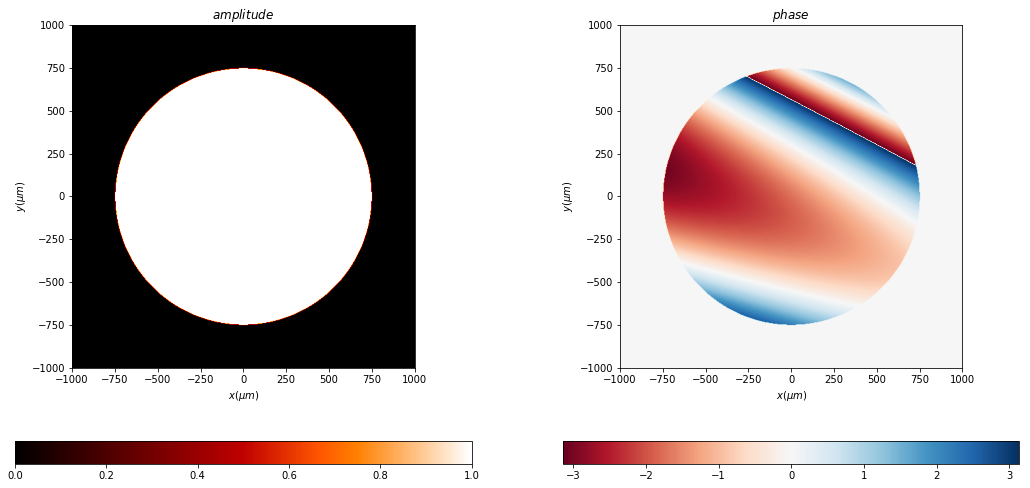

In [39]:
# parámetros del polinomio de Zernike
N = np.array([1, 1, 2, 2, 2])
M = np.array([-1, 1, -2, 0, 2])
c_nm = np.array([1, 1, 1, 1, 1])


x0 = np.linspace(-1*mm, 1*mm, 512)
y0 = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um

# creación del u
u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

u.zernike_beam(
    A=1, r0=(0, 0), radius=750*um, n=N, m=M, c_nm=c_nm, mask=True)
u.draw(kind='field')

## Zernike beams

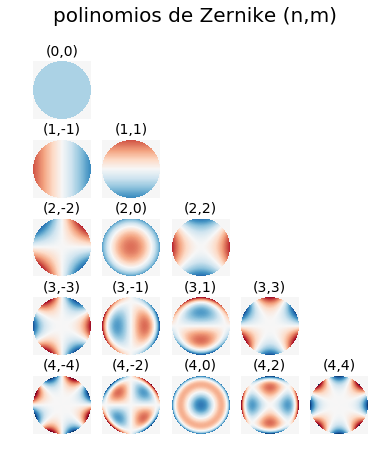

In [43]:
# tamaño de la matrix
N = 4


x0 = np.linspace(-1*mm, 1*mm, 512)
y0 = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um


# Dibujo
plt.figure(figsize=(6, 7))
plt.suptitle(u"polinomios de Zernike (n,m)", fontsize=20)

# Generación de la clase
u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

# Doble bucle for para ubicar en el drawing N*K haces de Laguerre
for n in range(0, N + 1):
    pos = 0
    for m in range(-n, n + 1, 2):
        pos = pos + 1

        # carga del haz de Laguerre
        u.zernike_beam(
            A=1,
            r0=(0, 0),
            radius=1*mm,
            n=np.array([n]),
            m=np.array([m]),
            c_nm=np.array([1]),
            mask=True)

        # carga de los drawings
        title = "(%d,%d)" % (n, m)
        plt.subplot(N + 1, N + 1, n * (N + 1) + pos)
        plt.axis('off')
        plt.title(title, fontsize=14)
        h2 = plt.imshow(np.angle(u.u))
        plt.clim(vmin=-np.pi, vmax=np.pi)
        h2.set_cmap("RdBu")

## Several plane waves inclined

reduce_matrix_size: size ini = (256, 256), size_final = (256, 256)
reduce_matrix_size: size ini = (256, 256), size_final = (256, 256)


((<matplotlib.image.AxesImage at 0x7f37cfbce828>,
  <matplotlib.image.AxesImage at 0x7f37cfba8c88>),
 None,
 None)

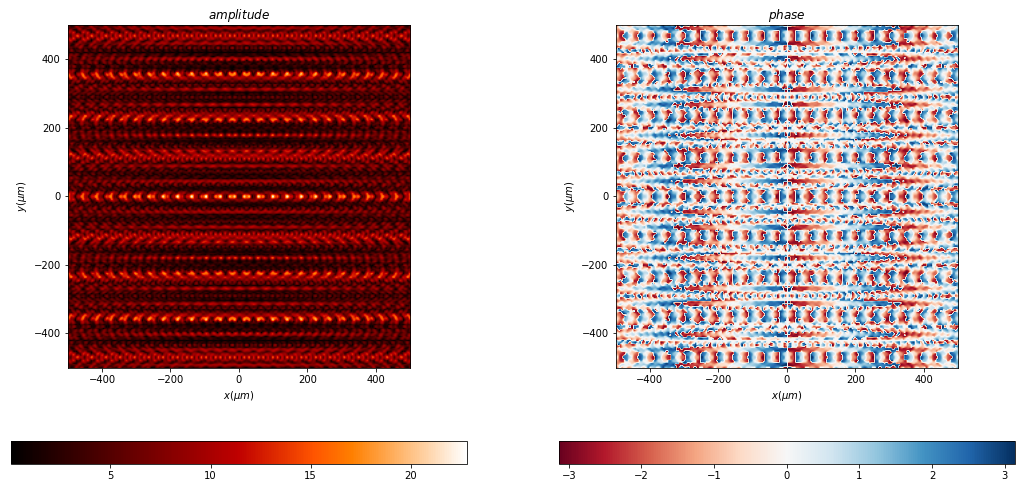

In [44]:
x0 = np.linspace(-500 * um, 500 * um, 256)
y0 = np.linspace(-500 * um, 500 * um, 256)
wavelength = 0.6328 * um

u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_waves_several_inclined(
    A=1, num_beams=(5, 5), max_angle=(5 * degrees, 180 * degrees))
u0.draw(kind='field')

## plane waves with parameters from dictionary

## several parallel Gauss beams

reduce_matrix_size: size ini = (256, 256), size_final = (256, 256)
reduce_matrix_size: size ini = (256, 256), size_final = (256, 256)


((<matplotlib.image.AxesImage at 0x7f37d460e2e8>,
  <matplotlib.image.AxesImage at 0x7f37d4048860>),
 None,
 None)

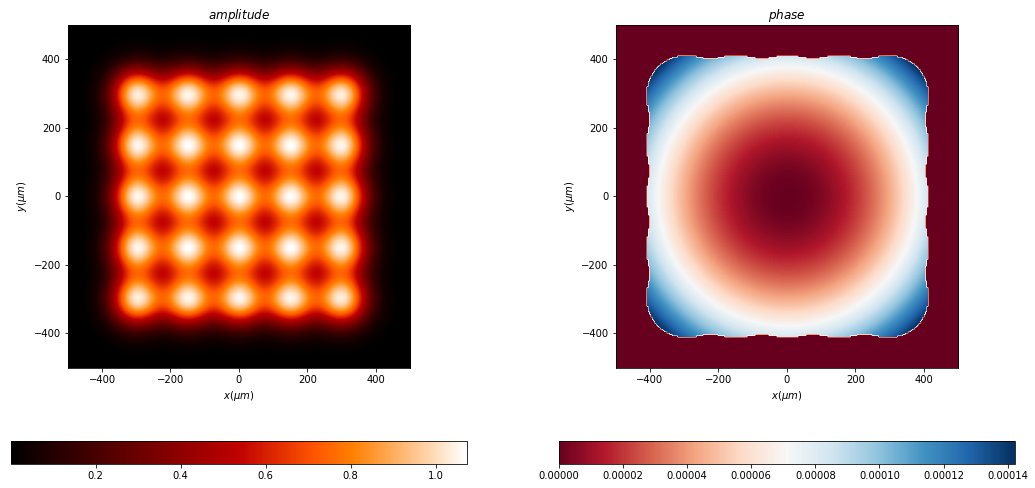

In [46]:
x0 = np.linspace(-500 * um, 500 * um, 256)
y0 = np.linspace(-500 * um, 500 * um, 256)
wavelength = 0.6328 * um

u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.gauss_beams_several_parallel(
    A=1,
    num_beams=(5, 5),
    w0=75 * um,
    z0=0 * um,
    r0=(0 * um, 0 * um),
    r_range=(750 * um, 750 * um),
    theta=0 * degrees,
    phi=0 * degrees)
u0.draw(kind='field')

## several inclined Gauss beams

reduce_matrix_size: size ini = (256, 256), size_final = (256, 256)
reduce_matrix_size: size ini = (256, 256), size_final = (256, 256)


((<matplotlib.image.AxesImage at 0x7f37d40d6550>,
  <matplotlib.image.AxesImage at 0x7f37d40f1ac8>),
 None,
 None)

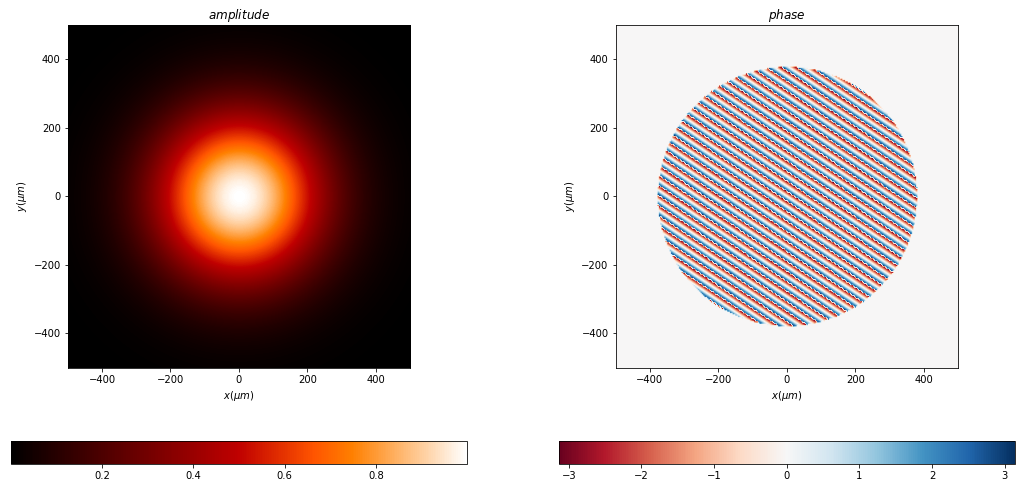

In [47]:
x0 = np.linspace(-500 * um, 500 * um, 256)
y0 = np.linspace(-500 * um, 500 * um, 256)
wavelength = 0.6328 * um

u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.gauss_beams_several_inclined(
    A=1,
    num_beams=(5, 5),
    w0=250 * um,
    r0=(0 * um, 0 * um),
    z0=0 * um,
    max_angle=(10 * degrees, 180 * degrees))
u0.draw(kind='field')

## interference

(<Figure size 360x324 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f37d43e3eb8>)

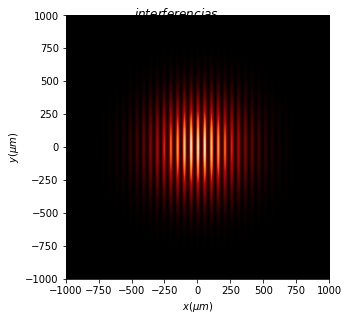

In [48]:
x0 = np.linspace(-1*mm, 1*mm, 512)
y0 = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u2 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

u1.gauss_beam(
    A=1,
    r0=(0 * um, 0 * um),
    w0=(500 * um, 500 * um),
    z0=0 * um,
    phi=2 * degrees,
    theta=10 * degrees)
u2.gauss_beam(
    A=1,
    r0=(0 * um, 0 * um),
    w0=(500 * um, 500 * um),
    z0=0 * um,
    phi=2 * degrees,
    theta=-10 * degrees)

u3 = u1 + u2
u3.draw(kind='intensity', title="$interferencias$")

### extented source (quitar)

In [50]:
from diffractio.scalar_masks_XY import Scalar_mask_XY


/home/luismiguel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


ValueError: Maximum allowed size exceeded

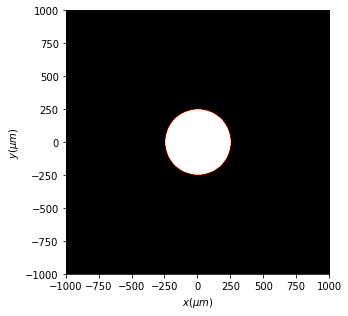

In [54]:
x = np.linspace(-1*mm, 1*mm, 512)
y = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um

# location of spherical sources
z0 = -5 * mm

# I define the mask where point sources are defined
t_mask = Scalar_mask_XY(x, y, wavelength)
t_mask.circle(r0=(0 * um, 0 * um), radius=(250 * um, 250 * um))
t_mask.draw()

# distance between point sources (if possible all pixels)
dist_sources_x = 20 * um
dist_sources_y = 20 * 0

# I create a empty matrix and I fill with dirac-deltas every dist_sources
X_mask = np.zeros_like(t_mask.X)
Y_mask = np.zeros_like(t_mask.X)

pos_x = np.arange(x[0], x[-1], dist_sources_x)
pos_y = np.arange(y[0], y[-1], dist_sources_y)

ix, vx, distx = nearest2(x, pos_x + 1)
iy, vy, disty = nearest2(y, pos_y + 1)

u1 = Scalar_source_XY(x, y, wavelength)
x0, y0 = np.meshgrid(ix, iy)
u1.u[x0, y0] = 1

u_mask = u1 * t_mask  # I have to extract positions from here

xpos = u_mask.X[u_mask.u > 0.5]
ypos = u_mask.Y[u_mask.u > 0.5]

u_final = Scalar_source_XY(x, y, wavelength)
u_temp = Scalar_source_XY(x, y, wavelength)
for x_i, y_i in zip(xpos, ypos):
    u_temp.spherical_wave(
        A=1, r0=(x_i, y_i), z0=z0, radius=10000 * um, mask=False)
    u_final = u_final + u_temp

u_final.draw(kind='field')